In [4]:
#importing libraries tensorflow, keras and matplotlib for creating
# models, layers, handling dataset, visualizing images

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [5]:
# each image size is 256*256
# in every process get 32 images
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [6]:
# loading Dataset to tensorflow
dataset = tf.keras.preprocessing.image_dataset_from_directory("Apple_leaf_diseas",
                                                   shuffle=True, 
                                                   image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                   batch_size = BATCH_SIZE)

Found 1730 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['healthy', 'rust', 'scab']

In [8]:
len(dataset)

55

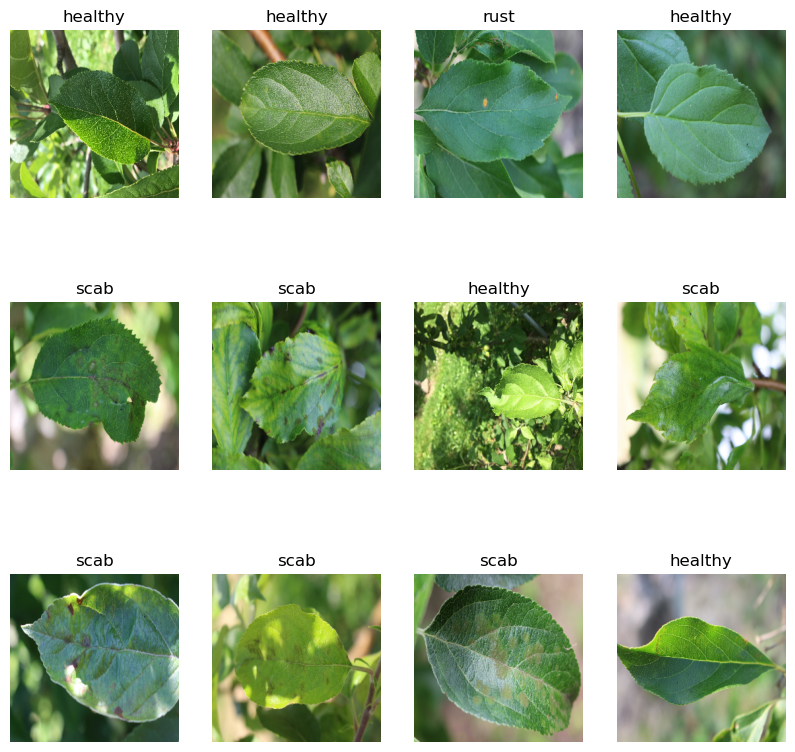

In [9]:
# visualizing 12 images just for test 
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    

In [11]:
# spliting datasets to 80% for training 
# 10% for testing and 10% for validation
trian_size = 0.8
len(dataset)*trian_size

44.0

In [12]:
train_ds = dataset.take(44)
len(train_ds)

44

In [13]:
test_ds = dataset.skip(44)
len(test_ds)

11

In [14]:
val_size = 0.1
len(dataset)*val_size

5.5

In [16]:
val_ds = test_ds.take(5)
len(val_ds)

5

In [17]:
test_ds = test_ds.skip(5)
len(test_ds)

6

In [18]:
# Datset partition function 
# this function splits the data in to three catagories training, testing and validation
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int (val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds        

In [19]:
# praparing the dataset
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

44

In [21]:
len(val_ds)

5

In [22]:
len(test_ds)

6

In [23]:
# caching and suffling the dataset to optimize performance druring traing
# and prefetch to ensure that the data is loaded efficiently
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


last step of preparing the data is to preprocessing and Augumentation 

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])